## 1. Introduction

This coursework aims to find the best deep neural network model architecture that could be able to classify the news into some finite categories.

This can help later on the search engines, for example, to classify the corpus to be displayed to the user based on the search keywords that are relevant to the user's input.

### 1.1 Domain-specific area

The journalism Industry has always been a great candidate for neural network challenges. Due to the immense number of articles, it provides a huge corpus to try out neural network architecture to help and aid news publishers in achieving the fastest time to deliver their articles. The journalism industry had always had a wide array of challenges to which NN could be a solution. One of the prominent problems is keeping an archive for the news categories. News articles are published since the beginning of the world wide web on the internet. However, news outlets had always faced the problems of going through millions of articles reading them and then classifying them into a news category. With the help of artificial neural network and modern AI techniques, the classification problem is a problem of the past. Gone are the days when news auditors would go through countless words in order to classify them. In this report, we would compare different ANN architecture and provide some metrics to help choose which algorithm would be suitable for our classification task. Our project could have even future integrations with a computer vision OCR tool which could even classify old articles before even the age of the internet. With it, the news outlet could have a huge archive which is properly classified. Though a potential project, we would only focus on the ANN task at hand. We hope that by the end of this report, we would have a fully functional model which could classify news articles into different categories. This would save the effort, time, and money which news outlets usually spend on classifying articles.
Another application to our model is integrating it with news feeder apps. As there are millions of articles on the internet with categories. Our model could help these news readers categorize the articles and organize them for the reader to enjoy and start even to recommend articles based on their categorisation.


### 1.2 Objectives
The objective of our project is to find a suitable artificial neural network architecture as a classification algorithm which would provide news outlets with predicting the news articles' category from its headline and abstract with a click of a button. The objectives of the report could be summarised as follows: 


1. Finding a dataset from real life which would provide the basis for training our model.
2. Exploring key features for the dataset using EDA techniques.
3. Provide a way to numerically analyze the content of the articles for easy classification as the model would not understand pieces of strings alone.
4. Apply Tokenization to serve the TF-IDF technique in converting strings to numerical values then scaling the values.
5. Build simple baseline neural network architecture.
6. Using overfitting and underfitting techniques on the model then compare the results to the baseline model.
7. Regularize the model using dropout and hyperparameter tuning to prevent over/under fitting
8. Evaluate the model by providing metrics for classification tasks. (Accuracy, F1-Score)

It is important to go through multiple ANN arcitecture as there is no silver bullet model for ANN problems. Thus as data scientists, it is our task to search our modelling toolbox and find an optimum and efficient way to classify articles into their corresponding categories. Thus we would try different combinations of algorithms and numerical representations of text to find the optimum combo.

Even if the classification model does not provide the necessary accuracy. It still has the potential to be used as a recommendation system which would still help news outlets into classifying the articles into the correct category. The results of the model would contribute as a step into automating the lives of many news outlets which would still save time, effort, and cost.






### 1.3 Dataset 

In this coursework, we will be using the "News Category Dataset" which provides us with a huge amount of data that consists of 209527k news headlines. The dataset is provided by Rishabh Misra and uploaded on Kaggle. This dataset was gathered from 2012 to 2022 and obtained from the HuffPost website. The dataset can be used to perform a wide variety of tasks due to its immense corpus which is categorized by article. Each row in this dataset consists of 6 features:

*link* (String): the URL of the news article.

*headline* (String): the title of the news article.

*category* (String): the category that the news article belongs to and this would be used as our target label.

*short_description* (String): the abstract of the news article.

*authors* (String): the author(s) who published the news article.

*date* (Date): the date of the news article that was published. The date follows the format (YYYY/MM/DD).

Our target is to classify the given news article into its corresponding category using mainly the short_description and the headline features, we have 207996 unique headlines and 187022 unique short descriptions.
We have 42 unique news categories, each category contains at least 1014 news articles. The top 10 ones with the corresponding number of news articles they include, in descending order, are:

* *POLITICS*: 35602
* *WELLNESS*: 17945
* *ENTERTAINMENT*: 17362
* *TRAVEL*: 9900
* *STYLE & BEAUTY*: 9814
* *PARENTING*: 8791
* *HEALTHY LIVING*: 6694
* *QUEER VOICES*: 6347
* *FOOD & DRINK*: 6340
* *BUSINESS*: 5992

As seen above, our dataset needs to be balanced. An imbalanced dataset means unequal distribution of the observations for each class label, therefore we should pay attention while evaluating our deep neural network models and not depend only on the accuracy metric as it wouldn't be accurate enough due to the imbalance in our dataset.

There are 194118k news articles gathered between January 2012 and May 2018 and from May 2018 to September 2022 15422k news articles are gathered. The top date that the data was collected was 2014-03-25. However, the HuffPost website does not maintain anymore this immense number of news articles.

Our dataset contains 471 duplicate rows in the short_description, headline, and category columns. Duplicates will be dropped in our data preprocessing phase as they are at the end of the same article.

### 1.4 Measure of Success

  As our dataset contains imbalances in the target variable (Categories). We would not mainly look at accuracy as it would not give a clear picture of how our model is performing, as accuracy is just a percentage of how well we predict vs. the number of predictions. If we are unlucky and all our major class labels are predicted correctly then we would have very high accuracy. However, this model may fail in a real-case scenario where all categories are of unequal distribution. We would however look at a confusion matrix consisting of different metrics such as precision, recall and the F1-Score.

  We can define precision as the ratio between the True Positives, or the actual class label or category, vs. what the model has predicted as the class label which is the number of true positives and false positives. The formula is given as follows 
  $\text{Precision} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Positive}}$
The recall is also a metric which would be beneficial when we have imbalances in the class labels. The recall is mainly a ratio between the True positive class and the Total actual number of positive labels. The formula is given as    Lastly, the F1- Score is a metric which is a mix between recall and precision. The formula is given by  $\text{Recall} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$ Lastly, the F1- Score is a metric which is a mix between recall and precision. The formula is given by $\text{F1-Score} = 2* \frac{\text{Precision}* \text{Recall}}{\text{Precision} + \text{Recall}}$ .

We will use the F-1 Score thorough out our model's evaluation while predicting, however we will use the accuracy while training our deep neural model then compare with the validation set before evaluating it on the test set.



## 2. Implementation

Now we will focus on the technical development part we will first, import our python libraries which would help us with removing stop words and the application of stemming and lemmatization. Also, we import the libraries for data visualization such as matplotlib.

In [ ]:
from keras import models, layers
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
import re
import string
import nltk
from nltk import pos_tag
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
# from sklearn import metrics
# from keras import metrics
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### 2.1 EDA

In this subsection, we focus on exploring our dataset visually by plotting the strings and visualizing their distribution. We also take a look at the categories we have and each of their counts.


At first, we read our dataset which we downloaded from Kaggle. The file format follows the JSON format. A JSON file is formatted as a {key: object,key: object, etc.}. For example, a single row is given by the following format: {"link": "https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9", "headline": "Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters", "category": "U.S. NEWS", "short_description": "Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.", "authors": "Carla K. Johnson, AP", "date": "2022-09-23"}

In [ ]:
## Reads Dataset from path as json lines = True reads the file as a json object per line.
dataframe=pd.read_json('/content/News_Category_Dataset_v3.json',lines=True)
display(dataframe.tail())
dataframe.info()

,link,headline,category,short_description,authors,date
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28
209526,https://www.huffingtonpost.com/entry/dwight-ho...,Dwight Howard Rips Teammates After Magic Loss ...,SPORTS,The five-time all-star center tore into his te...,,2012-01-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


There are 209527 rows in our dataset with 6 columns. All are strings except the date on which the article is released which has a datetime64 format.

At first, we replace any empty string with a Null value in order to replace it. However, as we found that there were no empty headlines which we could use to categorize our dataset without the short_description we leave them as it is.
We then search for Null values which are a problem for almost all machine learning models. We luckily find no Null values, except in short_description, which will ease our task. However, if we had found ones we would have dropped them from our dataset. We also replace any empty string

In [ ]:
# Check for null/missing values 
# Replace all empty strings with Nulls to count them in the isnull.sum() function
dataframe['category'].replace('', np.nan, inplace=True)
dataframe['short_description'].replace('', np.nan, inplace=True)
dataframe.isnull().sum()

link                     0
headline                 0
category                 0
short_description    19712
authors                  0
date                     0
dtype: int64

In [ ]:
# Subset Data To get the counts of articles between 2012 to 2018 and from 2018 to 2022.

from_2012_to_2018_headlines = dataframe[dataframe["date"].isin(pd.date_range(dataframe['date'].dt.date.min(), "2018-1-28"))].value_counts() #194118
print(len(from_2012_to_2018_headlines))
from_2018_to_2022_headlines = dataframe[dataframe["date"].isin(pd.date_range("2018-1-28", dataframe['date'].dt.date.max()))].value_counts() #15422
print(len(from_2018_to_2022_headlines))

174406
15422


We have 42 unique categories, we show the counts for each category as seen the categories are imbalanced with 'Politics' being the majority class and 'Education' the least.


In [ ]:
print(dataframe['category'].value_counts())

POLITICS          35601
WELLNESS          17942
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9811
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3571
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2100
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1443
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

We drop (link, date, authors) columns. The link column is considered an identifier, each article has its unique link. The author could write in multiple categories for example an author can write in comedy, tech, sports, etc. So the authors columns won't determine the category. Lastly, the published date won't affect the category as well.

In [ ]:
#Drop unused columns which are link ,date, author
new_dataframe = dataframe.drop(columns=['link','date','authors'])
new_dataframe.tail()

,headline,category,short_description
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...
209523,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr..."
209524,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked..."
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...
209526,Dwight Howard Rips Teammates After Magic Loss ...,SPORTS,The five-time all-star center tore into his te...


Now we plot the categories as a bar chart to see their distribution visually.

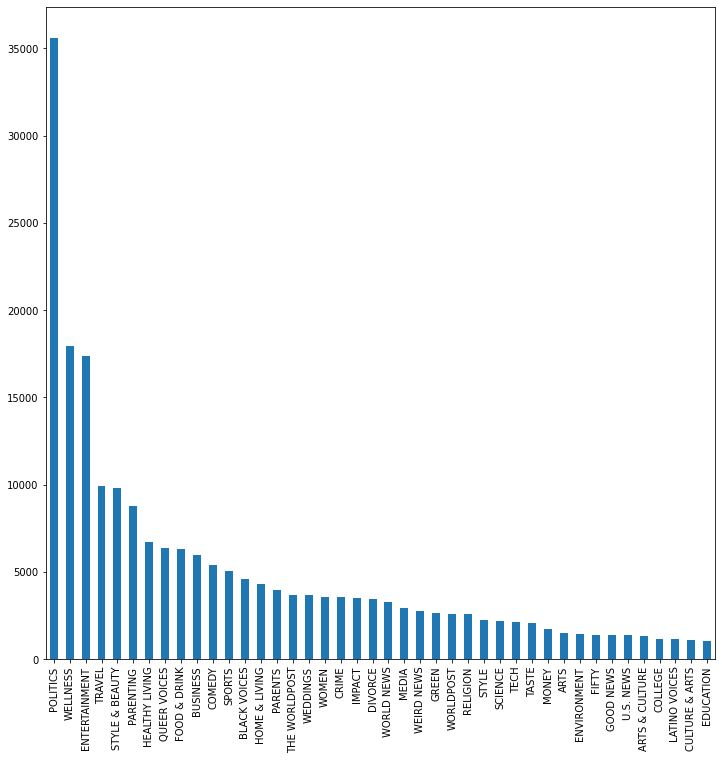

In [ ]:
# let's discover the top categories
# Plotting the total number of news by category for better visualization as a bar plot using matplotlib
plt.figure(figsize=(12, 12))
dataframe['category'].value_counts().plot(kind='bar')

We now start visualizing the top words used in each category by displaying a word cloud per category. The word cloud is very useful when presenting the classification algorithm to a layman person as they will get a colourful presentation on how the algorithm works by looking at word similarities and frequencies which helps bridge the connection between the technical side and the client side. For example, the words 'Travel', 'Hotel', 'Photo', and 'World' are frequent words in articles in the category of Travel. As the word size increases the frequency increases also.

We also remove stop words during our process. In order to remove redundant stop words such as articles and conjugations. 

We also concatenate the 'headline' column with the 'short_description' column to generate one column which will be the string on which we would do our classification.

In [ ]:
# let's make wordcloud for the first 20 categories to see the top words per category
# Set the nan values to null to avoid crashes in the word cloud algorithm
new_dataframe['short_description'].replace(np.nan, '', inplace=True)
#get the categories values as a numpy array 
categories=pd.unique(new_dataframe['category'])
# We took a copy of our dataframe then we combined the 'headline' and the 'short_description' columns together in one new column called 
# 'headline_shortDescription' in order to manipulate one column which contains all the texts
new_dataframe_copy=new_dataframe.copy()
new_dataframe_copy['headline_shortDescription']=new_dataframe_copy['headline']+new_dataframe_copy['short_description']

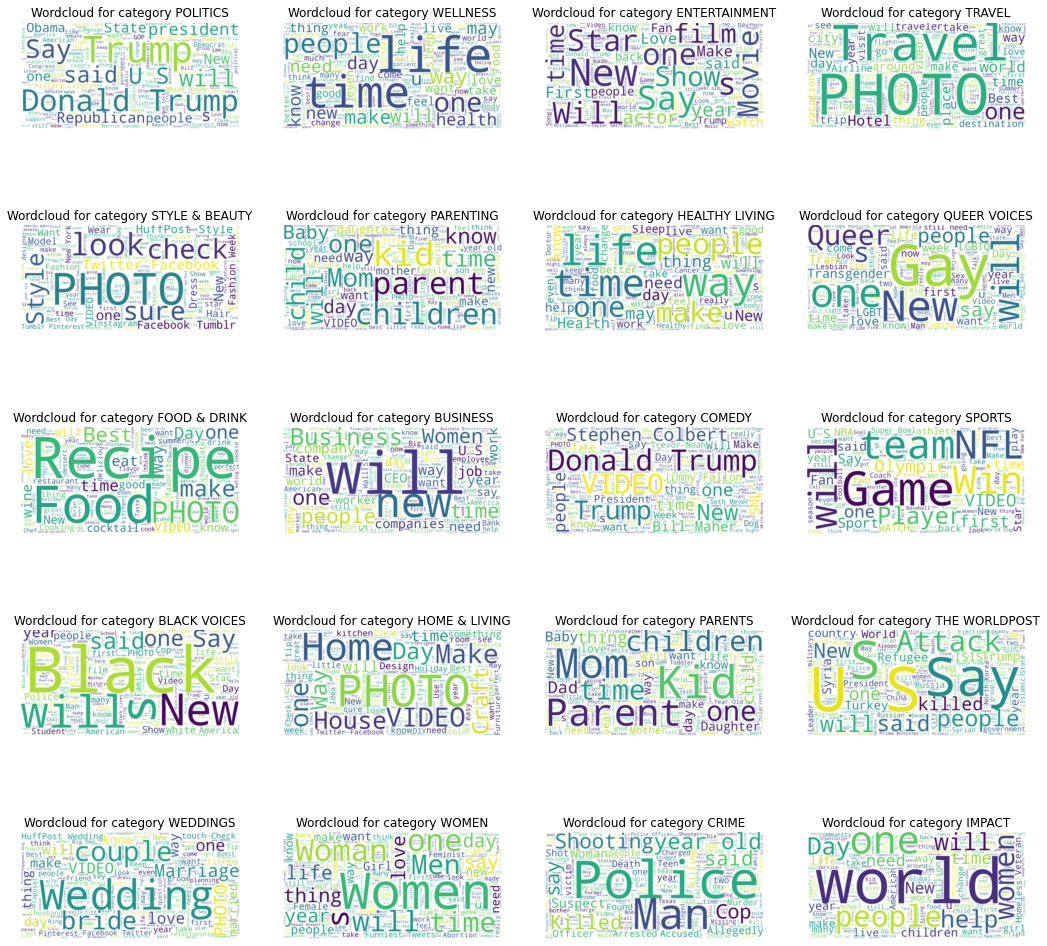

In [ ]:
textNews_per_category = []
for index in categories:
    category = new_dataframe_copy[new_dataframe_copy['category'] == index]
    text = category['headline_shortDescription'].values    # text is the headline and short_description of each category in our dataset
    textNews_per_category.append(text)

wc_per_category = WordCloud(max_words=500, min_font_size=20, height=1000, width=2050, background_color='white', stopwords=STOPWORDS)
plt.figure(figsize=(18,18))
for index, cat in enumerate(categories[:20]):
    plt.subplot(5,4,index+1)
    wordCloud = wc_per_category.generate(' '.join(textNews_per_category[index]))
    plt.imshow(wordCloud, interpolation= "bilinear")
    plt.title(f"Wordcloud for category {cat}")
    plt.axis('off')

### 2.2 Text Preprocessing

Now we shift our focus onto discussing the text preprocessing section. At first, we sanitize the data using the most popular methods used in the ANN literature. We first concatenate our 2 main columns which are "short_description" and "headline". We then apply to the newly generated column "headline_shortDescription" a function which simply makes all words into lowercase. Afterwards, we remove stop words from the new column by going through each piece of text and comparing it with the STOPWORDS list which is imported from the wordcloud library.  It is important to understand that stop words could hinder our algorithm as most English sentences contain stop words such as conjugations, and articles which would not be helpful in our classification task. Furthermore, we lemmatize the strings using the WordNetLemmatizer. We lemmatize as we would like all words to return their original meaning, for example, the word caring and cared would be lemmatized into care. We avoided using stemming as stemming just deletes the extra letters without taking into consideration the context and meaning of the word. For instance, caring would be converted to car which is a totally different word. Lastly, we remove all punctuations for completeness. We store our clean headline_shortDescription into a new column called clean_text.

In [ ]:
## Function to lowercase text
def text_cleaning(text):
  text=text.lower()
  text=re.sub(r"[\W\d\s]"," ",text)
  return text.strip()

## Function to remove stopwords using the STOPWORDS list in the word cloud library
def remove_stopwords(text):
  text=text.split()
  text_array = [t for t in text if t not in list(STOPWORDS)]
  return " ".join(text_array)

## Function to remove punctuation in text
def remove_punctuations(text):
  text = "".join([t for t in text if t not in string.punctuation and not t.isdigit()])
  return text

## Function to lemmatize nouns and verbs based by using the word tokenize function
def lemmatisation(text):
  lemmatizer=WordNetLemmatizer()
  text=" ".join([lemmatizer.lemmatize(str(i),str(j[0].lower())) if str(j[0]).lower() in ['n','v'] else lemmatizer.lemmatize(str(i)) for i,j in pos_tag(nltk.word_tokenize(text))])
  return text



In [ ]:
## Applying the cleaning functions to the headline_shortDescription

print('Example Sentence before cleaning: ',new_dataframe_copy['headline_shortDescription'][5])
new_dataframe_copy['clean_text']=new_dataframe_copy['headline_shortDescription'].apply(text_cleaning)
new_dataframe_copy['clean_text']=new_dataframe_copy['clean_text'].apply(remove_stopwords)
new_dataframe_copy['clean_text']=new_dataframe_copy['clean_text'].apply(lemmatisation)
new_dataframe_copy['clean_text']=new_dataframe_copy['clean_text'].apply(remove_punctuations)

print("**********")
print('Example Sentence after cleaning: ',new_dataframe_copy['clean_text'][5])

Example Sentence before cleaning:  Cleaner Was Dead In Belk Bathroom For 4 Days Before Body Found: PoliceThe 63-year-old woman was seen working at the South Carolina store on Thursday. She was found dead Monday after her family reported her missing, authorities said.
**********
Example Sentence after cleaning:  cleaner dead belk bathroom day body find policethe year old woman see work south carolina store thursday find dead monday family report miss authority say


Since the 'clean_text' column contains the text data after being preprocessed and the 'headline_shortDescription' column contains the text data before being preprocessed, we can see below the difference in terms of length. The maximum text length before applying preprocessing is 244 while the maximum text length after applying preprocessing is 149

In [ ]:
max_len_before = new_dataframe_copy['headline_shortDescription'].apply(lambda x:len(x.split())).max()
print("max text length before applying preprocessing ",max_len_before)
max_len_after = new_dataframe_copy['clean_text'].apply(lambda x:len(x.split())).max()
print("max text length after applying preprocessing ",max_len_after)


max text length before applying preprocessing  244
max text length after applying preprocessing  149


## 3. Data preparation 

### 3.1 Holdout validation

Our goal is to prepare our dataset in a format that helps to improve our machine learning model's performance, or to be more specific, reduce the loss score of our neural network. We will start our data preparation process by shuffling our data to change the order of the rows in order to spread all the categories across the dataset. Then we proceeded by applying the holdout validation technique which is the process of splitting your dataset into three subsets: the training set, the validation set and the testing set. 

The training set is used to train our machine learning model, the validation set is used for tuning our model's hyperparameters and the test set is to evaluate our model's performance. The holdout validation technique is the best way to consider when you have a large dataset so you can split it into three sets.



In [ ]:
df=new_dataframe_copy.sample(frac=1).reset_index(drop=True)

In [ ]:

# set aside 20% of train and validation data for evaluating model's hyperparameter tuning  
X_train, X_valid, y_train, y_valid = train_test_split(df['clean_text'], df['category'], test_size=0.2, random_state=np.random.seed(12345))

# Use the same function above for the test set evaluating model's performance
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=np.random.seed(12345))

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_valid shape: {}".format(X_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))

X_train shape: (125715,)
y_train shape: (125715,)
X_test shape: (41906,)
y_test shape: (41906,)
X_valid shape: (41906,)
y_valid shape: (41906,)


### 3.2 Dataset Tokenization & Vectorization

Tokenization is an NLP process that split the text into smaller units known as tokens while Vectorization is the process of converting these tokenized words into word vectors or numerical vectors represented in high-dimensional space. These high-dimensional spaces are known as tensors so we can feed our machine-learning model with these tensors to build or neural network. We will start by applying the tokenization technique on all our sets using the tokenizer provided by the keras library. The tokenizer has three main functions fit_on_texts(), texts_to_sequences() and texts_to_matrix(). 

* fit_on_texts : 

     The fit_on_texts() method takes as input a list of strings then creates a dictionary for each word/token, as a key, then assigns a unique integer index, as a value, based on the word positioning in the sentence.

* texts_to_sequences :

 The texts_to_sequences() is a method that converts a list of texts into a list of integer sequences using the word_index dictionary created by the fit_on_texts() method by mapping each word to its corresponding integer index. The output of the latest method, the integer sequences, can be passed as input to sequence-based models such as RNN where these types of models have an embedding layer that represents the given corpus in a numerical sparse matrix, also known as tensors. However, we are intending in this paper to illustrate the vectorization process independently with the aid of the third method provided by the tokenizer, mentioned above texts_to_matrix(). 
 

 * texts_to_matrix :

  The texts_to_matrix() method converts the entire corpus of documents into a numerical matrix, also known as tensors, and takes as parameters the corpus and the mode. The mode parameter determines how the text will be encoded and has four different values: binary, count, freq and tfidf. 
 
  The binary value encodes the text into a binary matrix that consists of zeros and ones where zero means the word is not present and one means the word is present. 

   The count value counts the number of times a word appears in the text and represents it in a matrix form. 

   The freq value represents the frequency of each word in a matrix where the frequency is the number of times a word appears divided by the total number of words in the corpus. 

   Finally, the tfidf value computes the TF-IDF score for each word and represents it in a matrix. In other technical words, the TF-IDF is a statistical measure used to determine the importance of each word relative to the corpus of documents. The tfidf score is calculated using two statistics, the first one is the term frequency which represents the number of times a word appears in a text divided by the total number of words and the second statistic is the inverse document frequency (IDF) that computes the logarithm of the total number of documents (numerator) divided by the number of the documents in which the target term occurs (denominator) then multiply these two statistic values. Words with high tfidf score values are considered to be more important than the ones with low score values. TF-IDF is one of the vectorization approaches based on the Bag of Words (BoW) model but it performs better due to the way it calculates the score of each word.


 Below we used the TF-IDF as an input value to the mode parameter of our texts_to_matrix() method.

In [ ]:
tokenizer=Tokenizer(num_words=3000,oov_token='<00V>')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_valid)
tokenizer.fit_on_texts(X_test)

train_matrix=tokenizer.texts_to_matrix(X_train, mode='tfidf')
test_matrix=tokenizer.texts_to_matrix(X_test, mode='tfidf')
valid_matrix=tokenizer.texts_to_matrix(X_valid, mode='tfidf')

The output of above code snippet will be a high-dimensional matrix where each row represents a document (text), each column represents a unique word available in our corpus and each element is the tf-idf score of the word in the document. This matrix represents the tensor that will be passed as an input to our deep learning network, but first we have to encode our class labels as well. Our class labels are array of string values which represents the categories, categorical variables, so we will apply label encoding on them. 



### 3.3 Label Encoding 

Label Encoding is a simple straightforward technique that encodes categorical variables as numerical values, in other words, it converts each categorical value to a unique integer value. These unique numerical values assigned to the categories do not represent any significant meaning, they do not provide any ranking order or any ordinal relationship between the categories so if any mathematical operations have been made on these numerical values, the result would be meaningless value and in our case, the order does not provide a certain plus. For example, if *Politics* category is assigned to number *'1'* as a value and *Comedy* category is assigned to number *'10'* as a value, this does not mean that *Politics* category has higher importance or is the most dominant category. 

In [ ]:
y_train_encoded = LabelEncoder().fit_transform(y_train)
y_test_encoded = LabelEncoder().fit_transform(y_test)
y_valid_encoded = LabelEncoder().fit_transform(y_valid)

### 3.3 One Hot Encoding

Thus, to avoid this problem, we will transform each numerical value assigned to a binary representation using the to_categorical() method. The to_categorical() is a method provided by keras.utils library that converts each integer value to binary representation in a matrix form where each category is represented by a binary vector with a 1 in the index that corresponds to the desired category. It only accepts an array of integers that's why we had first to convert our categorical variables to numerical values and then pass this array of numerical values to the to_categorical() method. We passed a second parameter to our to_categorical() method called *num_classes* to specify the number of classes we have in our dataset which represents the 42 unique categories.

In [ ]:
one_hot_y_train = to_categorical(y_train_encoded, num_classes=42)
one_hot_y_test = to_categorical(y_test_encoded, num_classes=42)
one_hot_y_valid = to_categorical(y_valid_encoded, num_classes=42)


The output of the to_categorical() method is a matrix where each column and row represent a unique class of our numerical dataset. Each element is a binary vector where 1 indicates the presence of the category and 0 is elsewhere within the one-hot encoded vector.



### 3.4 Data Scaling

Now our tensor is partially ready to be passed to our network, as they are presented in numerical values, but the values in our train, validation and test matrices are in different ranges. Some have large values and some have small values so we can say that our data is *heterogeneous* which means one feature can be between 0-1 range and another one can be between 50-100 range. Feeding our network with a wide range of values per feature will make the learning more difficult so we will scale each feature by letting each one varies roughly within the same range, thus our data will be *homogenous*. This makes our learning process easier for our neural network.

Scaling is the process of transforming the data within a specific range, this range is usually between 0 and 1. We will apply the Min-Max Scaling technique, which is most of the time the go-to technique to scale the data. It scales the data within a specified range where the minimum value is 0 and the maximum value is 1, [0,1] is the default range of the MinMaxScaler, these values could be changed but we will leave them as they are. 

In [ ]:
# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler(copy=False)

# Fit and Transform the data using the scaler
normalized_data_train_matrix = min_max_scaler.fit_transform(train_matrix)
normalized_data_test_matrix = min_max_scaler.fit_transform(test_matrix)
normalized_data_valid_matrix = min_max_scaler.fit_transform(valid_matrix)

Each element in our normalized data matrix has a float value that varies between 0 and 1. 
Now our data is in the tensor format which our neural model can learn from it normally.

## 4. Main Building Blocks of Neural Network

Our aim in this section is to build our neural network by defining the model then compiling and fitting it into our dataset. The input data now is scaled and represented as tensors and our labels are in binary format which will help our network to perform better. The problem we are trying to solve here is we want to assign the given news article a category out of 42 categories so we are trying initially to define the layout of the network but let's dig a little bit into the neural network in terms of its building blocks and its architecture then explain how it will work on our given dataset.

The main building blocks of any neural network are the neuron and the layer. Every network has a single input layer, a single output layer and at least one hidden layer. Each layer contains several one or multiple neurons except the input layer as it holds only the features of the dataset, for instance, if a dataset consists of five features thus our input layer will contain five placeholders. These placeholders are not considered neurons, they just define the tensor shape that the neural network will process. Whereas the hidden and the output layers contain neurons normally, we can consider the neuron as the smallest fundamental unit of any neural network and is sometimes called a node however this will be explained later in detail. 

### 4.1 Layer

Our first main building block is the layer, as we have mentioned above, each layer contains multiple neurons where the output of each neuron in the current layer is passed as an input to each neuron in the following layer. So we can consider the layer as a data-processing module that receives multiple input tensors of a specific shape and outputs meaningful tensor(s) of a specific shape. The layers between the input and output layers are known as hidden layers. Most deep learning consists of chaining successive simple layers which introduces the *dense layer* concept. Usually, the layers are densely connected so this means that the neurons of the layer are deeply connected to all the neurons of the following layer, this is known as *the Fully Connected Layer* or *Dense Layer*. The dense layer stores the data in a 2D tensor of shape (samples, features).





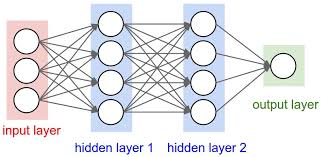

### 4.2 Neuron

Our second main building block is the neuron. Each neuron is considered as a mathematical function that learns on specific features by passing as input multiple input values $(x_{n})$ associated with their weights $(w_{n})$ then a dot product is applied between each $x$ with its respective weight $w$ and the result of each dot product is added to the following product. Every network has a single input layer that holds the number of feature of the dataset where each feature has multiple values based on number of observations of the dataset so each value per feature is passed to the input layer regardless how many observations we have. For more illustration, if our dataset shape is (2,5) where two is number of samples and five is the number of features so the input layer recieves the first vector that consists of one row, five columns and each element represents a specific value. Each element in this vector is the actual value of this feature in this row then it's passed to the first hidden layer with its associated weight. Each connection between the neurons is associated with a weight parameter. A dot product is applied between the input values and their corresponding weights then summed up and added to a * bias* value which is a constant value to avoid a non-zero output. We can illustrate this more using the following equation which is applied by each neuron in each layer: 

$$ \sum_{i=1}^n x_{i}w_{i} + b  $$


#### 4.2.1 Activation Function

After all those summations, a function called *activation function* is applied by the neuron to the weighted sum of the inputs. In the above equation, we have two linear operation - addition and dot product so passing this equation to an *activation function* will produce a non-linear neuron's output which will help our neuron to learn more complex mappings between the inputs and the output. Without an activation function, the neuron's output will be mapped linearly so it will be hard while dealing with large and complex data. We can consider the activation function a transfer function to get the desired output and let the neural network more powerful. There are many types of activation functions and the following ones are the commonly used: Sigmoid, ReLU, Tanh, Softmax. We will dig deep later on in the activation function that we will use while building our network. 

The picture below shows the inside structure of the neuron:

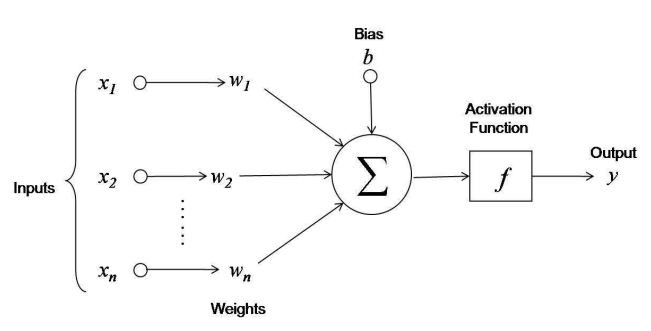

## 5. Build Baseline Model


Let's use the main building blocks we have mentioned above on our dataset to butild our model. In the cell below, we will create a fully connected network that consists of one input layer, one hidden layer and one output layer.

### 5.1 Input Layer 

 The input layer has no specific function other than passing the input values to the hidden layer since the input layer does not have any weights, bias or activation function so the tensor shape that our network will process is specified through this layer and this is done by passing the *input_shape* argument. The *input_shape* argument is a special argument that represents the shape of our tensor which is 2D tensor that consists of 3000 dimensions refers to the number of features in each input observation regardless the number of observations in the tensor. This means that our 2D tensor shape will be of shape (None, 3000) where 3000 refers to the number of features in the training data and None refers to the batch_size. 

### 5.2 Batch Size

The batch size is a paramter that is passed to the neural network while fitting our neural model on the training and validation sets, it refers to how many rows will be passed to our network at once. In other words, batch size is a configuration that specifies after how many samples we should compute the cost or the loss, then based on the loss value, the weights asociated on each connection are adjusted. For instance, if batch size has as a value '1', this will lead to overfitting because we have to compute the loss after passing each row to our network. On the other hand, if we passed a large value such as 50 or 70 this will lead to underfitting unless you have large amount of samples. So choosing the optimal value will be through hyperparameter tuning thus it will be known as 'mini-batch', however for now keras assigns a certain batch size value. Regardless the batch size the model will be trained in a dimensional space of size 3000.






In keras, as we have mentioned before, the input layer is not considered as a layer but a tensor, so we can consider the 2D tensor shape is coming from the input layer prior to the below first hidden dense layer with name *'Hidden_Layer_1'*. The input layer could be defined either like this: 

model.add(keras.Input(shape=(3000, ), name="Input_layer"))


or like it is defined below and both of them are right. 

### 5.3 Units

The *units* parameter takes as value 32 which represents the dimentionality of the output space which is a tensor of shape
(None, 32) where None is the unspecified batch size from the input layer. So the units parameter refers to the output size or the tensor shape expected from the layer and this output tensor is passed as an input to the next layer. When using keras, we don't have to worry about the compatibility because each layer automatically inferred its input shape as being the output shape of the layer that came before. Each layer consists of multiple neurons where each neuron applies its own equation which is: 


$$ \sum_{i=1}^n x_{i}w_{i} + b  $$

where $x_{i}$ refers to each input value passed to the neuron multiplied by its corresponding weight ($w_{i}$) assigned on each connection then the result of each dot product are summed up then added to the bias (b) value.

Each neuron applies its activation function, that is determined per layer, on the result of the above equation. We chose below 'relu' as an activation function for the first hidden layer but it's an arbitrary choice. 'ReLU' stands for Rectified Linear Unit that applies this function $$*R(x)=max(0,x)* $$

Therefore if $x$ is negative, ReLU will output zero as it’s the maximum value. If $x$ is positive, this will be the output. The output of each neuron, which is equivalent to the result of the activation function, is then passed as an input to each neuron in the following layer then the neuron of the following layer starts applying its activation function until it reaches the neuron of the output layer. 

### 5.4 Output Layer

The *units* paramter in the output layer has '42' as a value, which means that the output of the output layer is a 42-dimensional vector for each input sample where each dimension in this vector will encode a different output class. Each element in this vector is calculated using the *softmax* activation function that computes the probability distribution over the 42 different categories for each input sample. In other words, each element in the 42-dimensional output vector is the probability that this sample belongs to one of our 42 categories, therefore the input sample will be assigned to the category that has the highest probability value. Since it's a probability distribution thus the sum of the 42 scores is equal to 1. Usually *softmax* activation function is used in the last layer as it's able to handle multiple classes by computing the probability of the classes. Then we passed all the above parameters to our *Sequential* model that creates a sequence of layers stacked one after the other in the neural network.


It's usually preferred to start with low values, in other words, small model's capacity in terms of number of layers and neurons. We started by one hidden layer, as we have mentioned at the beginning, and 64 units.

In [ ]:
import html
%shell jupyter nbconvert --to html /content/DSM150_NN_Coursework.ipynb

[NbConvertApp] Converting notebook /content/DSM150_NN_Coursework.ipynb to html
[NbConvertApp] Writing 2203905 bytes to /content/DSM150_NN_Coursework.html


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 64)                192064    
                                                                 
 Output_Layer (Dense)        (None, 42)                2730      
                                                                 
Total params: 194,794
Trainable params: 194,794
Non-trainable params: 0
_________________________________________________________________
None


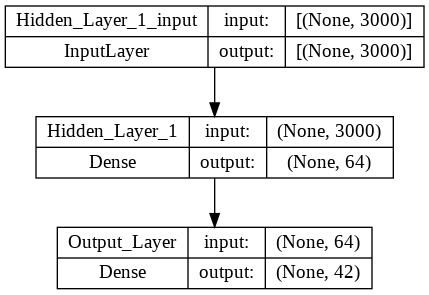

In [ ]:
model = models.Sequential()
model.add(layers.Dense(units=64,  activation='relu', input_shape=(3000,), name='Hidden_Layer_1'))
model.add(layers.Dense(42, activation='softmax', name='Output_Layer'))
print(model.summary())
plot_model(model, show_shapes=True)

### 5.5 Model Compilation 


#### 5.5.1 Optimizer 

Before training our neural model, we will configure it first to let it ready to use, using the compile method and passing some arguments. The first argument is the *optimizer* with value '*rmsprop*' which means that the weights of our network are updated after each epoch based on the loss function value so if the loss is high, the weights are optimized to get lower loss. The optimizer takes into consideration the previous values of the weights to compute the new weights values correctly and get accurate results so we can say that each epoch has its own weights. There are different types of optimizers such as: RMSProp, Adam, Stochastic Gradient Descent and many others. Each optimizer has its own options with different values such as the learning rate, momentum,....etc. Below we have used the RMSProp optimizer with its default paramters' values since it's the most commonly used, however it may not be the perfect choice so the optimizer is a paramter that needs to be tuned while applying hyperparamter tuning. 


#### 5.5.2 Loss Function

The second argument is the *loss function* which we can conclude from its name and from the above explanation that is the cost or the error calculated between the predicted value from the network and the actual target value, there is a difference between the network's output and the given target. There are different types of loss functions used to deal with different types of tasks and since our problem is a multi-class classification problem so the *categorical cross entropy* loss function suits our dataset. The categorical cross entropy measures the difference between the actual distribution of the response variable, for a single sample which is one-hot encoded vector with 1 as a value for the desired category and zeros elsewhere within the vector, and the predicted probability distribution output for that sample. It is usually used with softmax activation function since both of them can handle multiple classes.


#### 5.5.3 Metrics


The last configuration is the *metrics* parameter that is used to evaluate the model's performance. There may be a confusion between the loss function and the metric so the metric measures the model's overall performance after the training phase and at the end it's mainly for us as humans to evaluate the model's performance, while the loss function is used to optimize the learning network during the training phase with the help of the optimizer that reduces the loss value. 

Before compiling our model, we have defined our own functions that computes the precision, recall and f1-score with the help of the confusion matrix function. We have chosen the accuracy and the f1-score to have a significant insight. The F1-Score is like the accuracy, the higher value means the model is performing better.

In [ ]:
# #  calculate_recall() is a function that computes the recall of each class label where the recall is the measure of our model correctly
# # identifying True Positives
def calculate_recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (predicted_positives + K.epsilon())
    return recall

# # calculate_precision() is a function that computes the precision of each class label where the precision is the ratio between the true positives
# # and all the positives
def calculate_precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = calculate_precision(y_true, y_pred)
    recall = calculate_recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy',f1_score])

### 5.6 Model Training 

Now we will train our neural network using the training data on specific number of samples determined by *batch_size* which slices the dataset into batches. Based on the epochs value, our model will iterate repeatedly over the entire dataset so we can consider an epoch is equivalent to iteration. After each epoch that consists of 128 batches, as shown below, the model will calculate the loss and based on its value the optimizer will readjust the weights values then recalculate the loss and this process is known by *backpropagation*. The *backpropagation* process fine-tunes the weights of the network, after each epoch, to minimize the loss value. Then the model is evaluated using the validation data, that we have splitted in the holdout validation section, at the end of each epoch by calculating the loss and the metric determined in the configuration or compilation phase. 

We have specified below arbitrary values for the *batch_size* and the *epochs* but these paramters will be tuned during the hyperparameter tuning phase.

In [ ]:
np.random.seed(12345)
# hyperparameters
BATCH_SIZE = 128
EPOCHS = 10
# fit the model
history = model.fit(normalized_data_train_matrix, one_hot_y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0,
                     validation_data=(normalized_data_valid_matrix,one_hot_y_valid))  

Epoch 1/10
629/629 - 7s - loss: 1.2423 - accuracy: 0.6553 - f1_score: 0.6285 - val_loss: 1.7335 - val_accuracy: 0.5625 - val_f1_score: 0.5523 - 7s/epoch - 11ms/step
Epoch 2/10
629/629 - 5s - loss: 1.2213 - accuracy: 0.6605 - f1_score: 0.6339 - val_loss: 1.7483 - val_accuracy: 0.5608 - val_f1_score: 0.5519 - 5s/epoch - 8ms/step
Epoch 3/10
629/629 - 5s - loss: 1.2025 - accuracy: 0.6643 - f1_score: 0.6389 - val_loss: 1.7620 - val_accuracy: 0.5592 - val_f1_score: 0.5526 - 5s/epoch - 8ms/step
Epoch 4/10
629/629 - 6s - loss: 1.1854 - accuracy: 0.6684 - f1_score: 0.6434 - val_loss: 1.7823 - val_accuracy: 0.5593 - val_f1_score: 0.5530 - 6s/epoch - 9ms/step
Epoch 5/10
629/629 - 5s - loss: 1.1693 - accuracy: 0.6726 - f1_score: 0.6490 - val_loss: 1.7934 - val_accuracy: 0.5579 - val_f1_score: 0.5518 - 5s/epoch - 8ms/step
Epoch 6/10
629/629 - 5s - loss: 1.1540 - accuracy: 0.6769 - f1_score: 0.6536 - val_loss: 1.8114 - val_accuracy: 0.5556 - val_f1_score: 0.5498 - 5s/epoch - 7ms/step
Epoch 7/10
629/

Our network starts to iterate on the training data in mini-batches of 128 samples, 10 times over all the training data. At the end of each epoch (iteration), there is a slight pause as the network computes the weights based on the loss value for each training batch then adjusts the weights accordingly and computes the accuracy of this batch. Same goes for the validation set.

We can notice from the above results that the loss value of the training and the validation sets have high values, above 1.0. The training and validation sets, both of them are having low f1-score values, 62% and 55% respectively. We can notice that the accuracy values for both sets are not that far from the f1-score so we can consider the accuracy later on as well while interpreting our reults.

What if we increased the number of nodes for the first hidden layer ? and the epochs value as well ?

## 6. Scaling up: developing a model that overfits

In this section we will try to overfit our model and see its behaviour. This will be done by increasing the number of units in the first hidden layers, the epochs and the batch size values as well.

In [ ]:
np.random.seed(12345)
model1 = models.Sequential()
model1.add(layers.Dense(units=128,  activation='relu', input_shape=(3000,), name='Hidden_Layer_1'))
model1.add(layers.Dense(42, activation='softmax', name='Output_Layer'))
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy',f1_score])
# hyperparameters
BATCH_SIZE = 250
EPOCHS = 50
# fit the model
history1 = model1.fit(normalized_data_train_matrix, one_hot_y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0,
                     validation_data=(normalized_data_valid_matrix,one_hot_y_valid))

Epoch 1/50
503/503 - 7s - loss: 2.3919 - accuracy: 0.4265 - f1_score: 0.2675 - val_loss: 1.8307 - val_accuracy: 0.5252 - val_f1_score: 0.4621 - 7s/epoch - 15ms/step
Epoch 2/50
503/503 - 6s - loss: 1.6834 - accuracy: 0.5557 - f1_score: 0.4931 - val_loss: 1.6590 - val_accuracy: 0.5553 - val_f1_score: 0.5208 - 6s/epoch - 13ms/step
Epoch 3/50
503/503 - 7s - loss: 1.5212 - accuracy: 0.5879 - f1_score: 0.5389 - val_loss: 1.6201 - val_accuracy: 0.5637 - val_f1_score: 0.5341 - 7s/epoch - 13ms/step
Epoch 4/50
503/503 - 6s - loss: 1.4363 - accuracy: 0.6047 - f1_score: 0.5634 - val_loss: 1.6167 - val_accuracy: 0.5656 - val_f1_score: 0.5448 - 6s/epoch - 13ms/step
Epoch 5/50
503/503 - 6s - loss: 1.3767 - accuracy: 0.6185 - f1_score: 0.5804 - val_loss: 1.6202 - val_accuracy: 0.5650 - val_f1_score: 0.5475 - 6s/epoch - 12ms/step
Epoch 6/50
503/503 - 6s - loss: 1.3279 - accuracy: 0.6287 - f1_score: 0.5949 - val_loss: 1.6289 - val_accuracy: 0.5633 - val_f1_score: 0.5489 - 6s/epoch - 12ms/step
Epoch 7/50

### 6.1 Visualize the loss and f1-score of one hidden layer

In the following two listing, we will visualize the training and validation loss side by side and in another figure we will visualize the training and validation accuracy side by side

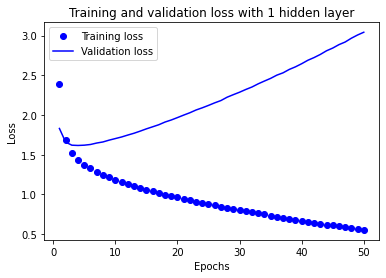

In [ ]:
history_dict = history1.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
# len(history_dict.get('accuracy'))
epochs = range(1, len(history_dict.get('accuracy')) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss with 1 hidden layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

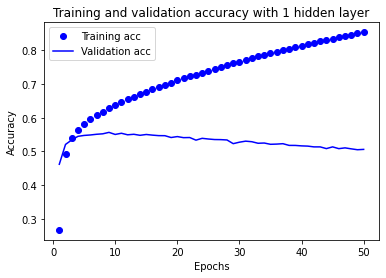

In [ ]:
plt.clf()
f1_score_values = history_dict['f1_score']
val_f1_score_values = history_dict['val_f1_score']
plt.plot(epochs, f1_score_values, 'bo', label='Training acc')
plt.plot(epochs, val_f1_score_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy with 1 hidden layer')
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.legend()
plt.show()

After increasing the number of neurons from 64 to 128 and the epochs value from 10 to 50, we can notice that the f1_score of the training set is increasing with every epoch, this noticeable starting from the second epoch while the validation set f1_score is almost within the same range from the first epoch. The f1_score of the training set has as a value 83% and the validation set has as a value 50%

The same case when it comes to the loss, the loss value of the training set decreases with every epoch however still big value, which means that still our network needs to be trained. On the other side, the loss of the validation set is increasing with every epoch with no improvement at all. 

Let's train our neural network more by adding a second hidden layer with the same number of neurons and same number of epochs and batch size.





### 6.2 Adding Hidden Layer

In [ ]:
np.random.seed(12345)
model1 = models.Sequential()
model1.add(layers.Dense(units=128,  activation='relu', input_shape=(3000,), name='Hidden_Layer_1'))
model1.add(layers.Dense(units=128, activation='relu', name='Hidden_Layer_2'))
model1.add(layers.Dense(42, activation='softmax', name='Output_Layer'))
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy',f1_score])
# hyperparameters
BATCH_SIZE = 250
EPOCHS = 50
# fit the model
history1 = model1.fit(normalized_data_train_matrix, one_hot_y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0,
                     validation_data=(normalized_data_valid_matrix,one_hot_y_valid))

Epoch 1/50
503/503 - 10s - loss: 2.2009 - accuracy: 0.4439 - f1_score: 0.3545 - val_loss: 1.7918 - val_accuracy: 0.5310 - val_f1_score: 0.4922 - 10s/epoch - 21ms/step
Epoch 2/50
503/503 - 8s - loss: 1.6261 - accuracy: 0.5629 - f1_score: 0.5182 - val_loss: 1.6780 - val_accuracy: 0.5556 - val_f1_score: 0.5248 - 8s/epoch - 15ms/step
Epoch 3/50
503/503 - 8s - loss: 1.4810 - accuracy: 0.5923 - f1_score: 0.5541 - val_loss: 1.6349 - val_accuracy: 0.5608 - val_f1_score: 0.5339 - 8s/epoch - 15ms/step
Epoch 4/50
503/503 - 7s - loss: 1.3907 - accuracy: 0.6105 - f1_score: 0.5788 - val_loss: 1.6232 - val_accuracy: 0.5629 - val_f1_score: 0.5445 - 7s/epoch - 14ms/step
Epoch 5/50
503/503 - 6s - loss: 1.3181 - accuracy: 0.6271 - f1_score: 0.5996 - val_loss: 1.6256 - val_accuracy: 0.5656 - val_f1_score: 0.5510 - 6s/epoch - 12ms/step
Epoch 6/50
503/503 - 7s - loss: 1.2553 - accuracy: 0.6419 - f1_score: 0.6178 - val_loss: 1.6407 - val_accuracy: 0.5662 - val_f1_score: 0.5532 - 7s/epoch - 13ms/step
Epoch 7/

####  6.2.1 Visulize the loss and f1-score of two hidden layers

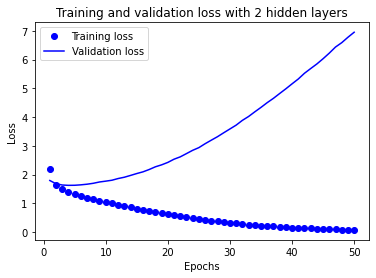

In [ ]:
plt.clf()
history_dict = history1.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
# len(history_dict.get('accuracy'))
epochs = range(1, len(history_dict.get('accuracy')) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss with 2 hidden layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

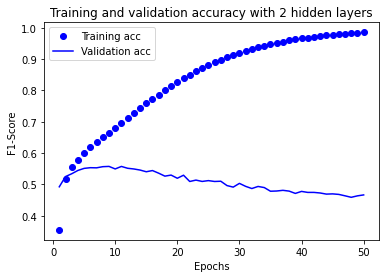

In [ ]:
plt.clf()
f1_score_values = history_dict['f1_score']
val_f1_score_values = history_dict['val_f1_score']
plt.plot(epochs, f1_score_values, 'bo', label='Training acc')
plt.plot(epochs, val_f1_score_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy with 2 hidden layers')
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.legend()
plt.show()

 We can notice from the above figure that represents the loss, the loss of the training value decreased from 0.55 to  which is considered as an improvement when comparing to the loss of the validation set that increased from 3.0428 to 6.9534. Regarding the accuracy, there is a huge difference in the training set accuracy because when we added the second hidden layer, it increased from 83% to 98%. Whereas the validation set accuracy decreased by 4%, from 50% to 46%. This means that the training phase of our neural model is better than the validation phase which leads to *overfitted model*. 


Overfitting happens when a model performs very well on the training data with high accuracy however when it comes to unseen data, the accuracy decreased due to the high percentage of error.

When we added the second hidden layer, the model started to overfit faster than the model with one hidden layer.

## 7. Model Regularization

In order to avoid overfitting, we will start regularizing our neural network. Regularization could be applied by changing our network's architecture, our model's capacity in terms of number of layers and number of neurons per layer, applying hyperparameter tuning and adding dropout.


 We will start by changing our model's architecture and capacity.





### 7.1 Changing our Neural Network Architecture

While we were trying to overfit our neural model in the previous section, the validation f1-score reaches the lowest value, 46%, when we added the second hidden layer however when we had one hidden layer, the lowest f1-score was 50%. Moreover, the difference between the f1-scores of the training sets has increased when we added the second hidden layer from 83% to 98%. Apparently, that our deep neural model performs better on our data when we have single hidden layer.

Thus, We will scale down our neural network by removing the second hidden layer while keeping the batch size and epoch as they are as we will try to tune them later.

### 7.2 Dropout 

Dropout is one of the techniques that prevents overfitting by reducing the large training set size and dropping out part of the data. In other words, the input or the hidden layer's output is randomly dropped out during the training phase and this is done by replacing the actual values with zeros. Therefore, the input tensor will be passed on to the following layer will include zeros with specific percentage specified.  This percentage is known by the *rate* and its value varies between 0.2 and 0.5 which means that you can reduce the output size of the layer preceded starting from 20% till 50%.

Below we will try to add the dropout layer to our architecture and try different values for the rate parameter.

In [ ]:
np.random.seed(12345)
regularized_model = models.Sequential()
regularized_model.add(layers.Dense(units=128,  activation='relu', input_shape=(3000,), name='Hidden_Layer_1'))
regularized_model.add(layers.Dropout(0.2))
# regularized_model.add(layers.Dense(units=256, activation='relu', name='Hidden_Layer_2'))
# regularized_model.add(layers.Dropout(0.2))
regularized_model.add(layers.Dense(42, activation='softmax', name='Output_Layer'))
regularized_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', f1_score])
# hyperparameters
BATCH_SIZE = 250
EPOCHS = 50
# fit the model
regularized_history = regularized_model.fit(normalized_data_train_matrix, one_hot_y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0,
                     validation_data=(normalized_data_valid_matrix,one_hot_y_valid))

Epoch 1/50
503/503 - 7s - loss: 2.4665 - accuracy: 0.4055 - f1_score: 0.2454 - val_loss: 1.9002 - val_accuracy: 0.5163 - val_f1_score: 0.4458 - 7s/epoch - 15ms/step
Epoch 2/50
503/503 - 7s - loss: 1.7642 - accuracy: 0.5395 - f1_score: 0.4731 - val_loss: 1.7000 - val_accuracy: 0.5507 - val_f1_score: 0.5106 - 7s/epoch - 13ms/step
Epoch 3/50
503/503 - 6s - loss: 1.5943 - accuracy: 0.5712 - f1_score: 0.5211 - val_loss: 1.6484 - val_accuracy: 0.5618 - val_f1_score: 0.5284 - 6s/epoch - 13ms/step
Epoch 4/50
503/503 - 7s - loss: 1.5136 - accuracy: 0.5889 - f1_score: 0.5442 - val_loss: 1.6327 - val_accuracy: 0.5665 - val_f1_score: 0.5358 - 7s/epoch - 13ms/step
Epoch 5/50
503/503 - 7s - loss: 1.4560 - accuracy: 0.6010 - f1_score: 0.5597 - val_loss: 1.6338 - val_accuracy: 0.5677 - val_f1_score: 0.5422 - 7s/epoch - 14ms/step
Epoch 6/50
503/503 - 7s - loss: 1.4161 - accuracy: 0.6103 - f1_score: 0.5718 - val_loss: 1.6415 - val_accuracy: 0.5679 - val_f1_score: 0.5456 - 7s/epoch - 13ms/step
Epoch 7/50

In [ ]:
np.random.seed(12345)
# we changed here the units value from 128 to 256
regularized_model = models.Sequential()
regularized_model.add(layers.Dense(units=256,  activation='relu', input_shape=(3000,), name='Hidden_Layer_1'))
regularized_model.add(layers.Dropout(0.2))
regularized_model.add(layers.Dense(42, activation='softmax', name='Output_Layer'))
regularized_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', f1_score])
# hyperparameters
BATCH_SIZE = 250 
EPOCHS = 50
# fit the model
regularized_history = regularized_model.fit(normalized_data_train_matrix, one_hot_y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0,
                     validation_data=(normalized_data_valid_matrix,one_hot_y_valid))

Epoch 1/50
503/503 - 13s - loss: 2.2715 - accuracy: 0.4436 - f1_score: 0.3064 - val_loss: 1.7605 - val_accuracy: 0.5409 - val_f1_score: 0.4880 - 13s/epoch - 25ms/step
Epoch 2/50
503/503 - 10s - loss: 1.6398 - accuracy: 0.5632 - f1_score: 0.5086 - val_loss: 1.6386 - val_accuracy: 0.5639 - val_f1_score: 0.5319 - 10s/epoch - 21ms/step
Epoch 3/50
503/503 - 12s - loss: 1.4997 - accuracy: 0.5921 - f1_score: 0.5472 - val_loss: 1.6224 - val_accuracy: 0.5691 - val_f1_score: 0.5415 - 12s/epoch - 23ms/step
Epoch 4/50
503/503 - 12s - loss: 1.4229 - accuracy: 0.6083 - f1_score: 0.5699 - val_loss: 1.6258 - val_accuracy: 0.5691 - val_f1_score: 0.5461 - 12s/epoch - 24ms/step
Epoch 5/50
503/503 - 10s - loss: 1.3662 - accuracy: 0.6212 - f1_score: 0.5855 - val_loss: 1.6419 - val_accuracy: 0.5715 - val_f1_score: 0.5513 - 10s/epoch - 20ms/step
Epoch 6/50
503/503 - 10s - loss: 1.3199 - accuracy: 0.6324 - f1_score: 0.5988 - val_loss: 1.6607 - val_accuracy: 0.5717 - val_f1_score: 0.5546 - 10s/epoch - 20ms/ste

In [ ]:
np.random.seed(12345)
regularized_model = models.Sequential()
regularized_model.add(layers.Dense(units=256,  activation='relu', input_shape=(3000,), name='Hidden_Layer_1'))
regularized_model.add(layers.Dropout(0.3))
# regularized_model.add(layers.Dense(units=256, activation='relu', name='Hidden_Layer_2'))
# regularized_model.add(layers.Dropout(0.2))
regularized_model.add(layers.Dense(42, activation='softmax', name='Output_Layer'))
regularized_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy',f1_score])
# hyperparameters
BATCH_SIZE = 250
EPOCHS = 50
# fit the model
regularized_history = regularized_model.fit(normalized_data_train_matrix, one_hot_y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0,
                     validation_data=(normalized_data_valid_matrix,one_hot_y_valid))
# 1 layer 128
# Epoch 20/20
# 925/925 - 25s - loss: 0.0152 - accuracy: 0.9962 - val_loss: 13.9585 - val_accuracy: 0.4960 - 25s/epoch - 27ms/step

Epoch 1/50
503/503 - 16s - loss: 2.3117 - accuracy: 0.4361 - f1_score: 0.2975 - val_loss: 1.7939 - val_accuracy: 0.5347 - val_f1_score: 0.4766 - 16s/epoch - 32ms/step
Epoch 2/50
503/503 - 10s - loss: 1.6698 - accuracy: 0.5570 - f1_score: 0.5005 - val_loss: 1.6595 - val_accuracy: 0.5596 - val_f1_score: 0.5247 - 10s/epoch - 20ms/step
Epoch 3/50
503/503 - 9s - loss: 1.5314 - accuracy: 0.5842 - f1_score: 0.5389 - val_loss: 1.6352 - val_accuracy: 0.5648 - val_f1_score: 0.5391 - 9s/epoch - 18ms/step
Epoch 4/50
503/503 - 11s - loss: 1.4565 - accuracy: 0.6012 - f1_score: 0.5605 - val_loss: 1.6339 - val_accuracy: 0.5690 - val_f1_score: 0.5432 - 11s/epoch - 22ms/step
Epoch 5/50
503/503 - 10s - loss: 1.4042 - accuracy: 0.6131 - f1_score: 0.5767 - val_loss: 1.6423 - val_accuracy: 0.5695 - val_f1_score: 0.5460 - 10s/epoch - 19ms/step
Epoch 6/50
503/503 - 10s - loss: 1.3643 - accuracy: 0.6231 - f1_score: 0.5877 - val_loss: 1.6620 - val_accuracy: 0.5699 - val_f1_score: 0.5486 - 10s/epoch - 19ms/step


In [ ]:
np.random.seed(12345)
regularized_model = models.Sequential()
regularized_model.add(layers.Dense(units=512,  activation='relu', input_shape=(3000,), name='Hidden_Layer_1'))
regularized_model.add(layers.Dropout(0.2))
# regularized_model.add(layers.Dense(units=256, activation='relu', name='Hidden_Layer_2'))
# regularized_model.add(layers.Dropout(0.2))
regularized_model.add(layers.Dense(42, activation='softmax', name='Output_Layer'))
regularized_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy',f1_score])
# hyperparameters
BATCH_SIZE = 250
EPOCHS = 50
# fit the model
regularized_history = regularized_model.fit(normalized_data_train_matrix, one_hot_y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0,
                     validation_data=(normalized_data_valid_matrix,one_hot_y_valid))
# 1 layer 128
# Epoch 20/20
# 925/925 - 25s - loss: 0.0152 - accuracy: 0.9962 - val_loss: 13.9585 - val_accuracy: 0.4960 - 25s/epoch - 27ms/step

Epoch 1/50
503/503 - 19s - loss: 2.1136 - accuracy: 0.4712 - f1_score: 0.3594 - val_loss: 1.6846 - val_accuracy: 0.5568 - val_f1_score: 0.5081 - 19s/epoch - 38ms/step
Epoch 2/50
503/503 - 20s - loss: 1.5538 - accuracy: 0.5810 - f1_score: 0.5325 - val_loss: 1.6203 - val_accuracy: 0.5690 - val_f1_score: 0.5368 - 20s/epoch - 39ms/step
Epoch 3/50
503/503 - 20s - loss: 1.4293 - accuracy: 0.6054 - f1_score: 0.5682 - val_loss: 1.6227 - val_accuracy: 0.5710 - val_f1_score: 0.5475 - 20s/epoch - 39ms/step
Epoch 4/50
503/503 - 19s - loss: 1.3483 - accuracy: 0.6237 - f1_score: 0.5906 - val_loss: 1.6386 - val_accuracy: 0.5712 - val_f1_score: 0.5533 - 19s/epoch - 37ms/step
Epoch 5/50
503/503 - 19s - loss: 1.2830 - accuracy: 0.6399 - f1_score: 0.6088 - val_loss: 1.6675 - val_accuracy: 0.5688 - val_f1_score: 0.5543 - 19s/epoch - 38ms/step
Epoch 6/50
503/503 - 19s - loss: 1.2272 - accuracy: 0.6530 - f1_score: 0.6247 - val_loss: 1.6978 - val_accuracy: 0.5668 - val_f1_score: 0.5518 - 19s/epoch - 39ms/ste

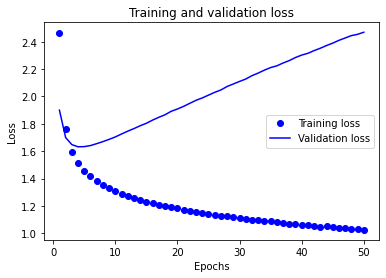

In [ ]:
regularized_history_dict = regularized_history.history
loss_values = regularized_history_dict['loss']
val_loss_values = regularized_history_dict['val_loss']
# len(history_dict.get('accuracy'))
epochs = range(1, len(regularized_history_dict.get('accuracy')) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

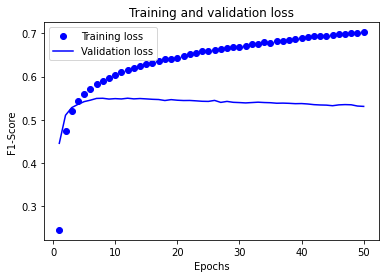

In [ ]:
plt.clf()
regularized_history_dict = regularized_history.history
f1_score_values = regularized_history_dict['f1_score']
val_f1_score_values = regularized_history_dict['val_f1_score']
# len(history_dict.get('accuracy'))
epochs = range(1, len(regularized_history_dict.get('accuracy')) + 1)
plt.plot(epochs, f1_score_values, 'bo', label='Training loss')
plt.plot(epochs, val_f1_score_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.legend()
plt.show()

Dropout technique deals better with high dimensional datasets as it drops out part of the dataset based on the rate value provided, the neural model is trained on this dropped out dataset. However, in our case, there wasn't a remarkable change neither in the f1-score nor in the loss as they are almost the same as in section 6, when we scaled up our model with number of neurons equals to 128, epoch equals to 50 and batch size is equal to 250. When we applied the dropout technique, our neural model starts to overfit slower, the overfitting started to appear in later epochs compared to the baseline and overfitted models and this is due to the percentage of deduction occured on the output of the hidden layer. 

In addition, it didn't improve the loss significantly and the time consumed to run the previous cells was higher than the normal but this could be due to our computational resources, our machine used to perform this coursework.

### 7.3 Hyperparameter Tuning

Let's move to our last technique in our journey to avoid overfitting, hyperparamter tuning by tuning some of our paramters such as the batch size and the epoch as they played a huge role when we changed them in the prvious sections regardless the units value. The values that provide the lowest loss value and the highest accuracy, will be considered the best set of parameters.

In [ ]:
# Function to generate Deep ANN model 
# def create_model(Neurons_Trial):
def create_model():
    regularized_model = models.Sequential()
    regularized_model.add(layers.Dense(units=128, input_shape=(3000,), activation='relu'))
    regularized_model.add(layers.Dense(units=42, activation='softmax'))
    regularized_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', f1_score])
    return regularized_model

SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Loss', 'Accuracy', 'Validation_loss', 'Validation_accuracy','f1_score','Validation_f1score'])
ParametersGrid={'batch_size':[200, 250], 'epochs':[ 20, 30], 'Optimizer_Trial':['adam', 'rmsprop', 'SGD'],
                  'Neurons_Trial': [64,128,256],'Activation':['relu','elu','sigmoid']   }
TrialNumber=0
for batch_size_trial in ParametersGrid.get('batch_size'):
    for epochs_trial in ParametersGrid.get('epochs'):
          TrialNumber+=1
          classifier=create_model()
          tuned_model=classifier.fit(normalized_data_train_matrix, one_hot_y_train, batch_size=batch_size_trial, epochs=epochs_trial, verbose=0,
                        validation_data=(normalized_data_valid_matrix,one_hot_y_valid))
          # Fetching the accuracy of the training
          Loss = tuned_model.history['loss'][-1]
          Accuracy = tuned_model.history['accuracy'][-1]
          Validation_loss = tuned_model.history['val_loss'][-1]
          Validation_accuracy = tuned_model.history['val_accuracy'][-1]
          f1_score = tuned_model.history['f1_score'][-1]
          Validation_f1score = tuned_model.history['val_f1_score'][-1]
          
          # printing the results of the current iteration
          print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial,'Loss: ', Loss,'-', 
                'Accuracy:', Accuracy,'-', 'Validation_loss: ',Validation_loss,'-', 'Validation_accuracy: ',Validation_accuracy, 
                'F1-Score: ', f1_score, 'Validation_f1score: ',Validation_f1score)
          
          SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
          'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Loss, Accuracy, Validation_loss, Validation_accuracy,
           f1_score, Validation_f1score]],
           columns=['TrialNumber', 'Parameters', 'Loss', 'Accuracy', 'Validation_loss', 'Validation_accuracy','f1_score','Validation_f1score'] ))
      

print(SearchResultsData)

At the beginning of applying hyperparameter tuning function, we have used larger and more numbers for the batch size and the epoch however due to the low computational resources of our machine, the RAM memory crashed immediately after the second epoch.

Therefore, after many trials, we have reached the best set of params with the following values:

* units value equals to 128
* epoch value equals to 20
* batch size euqals to 250

Hence, our neural deep model performs better with one hidden layer and passing to it the above values. There were also other trials on tuning the optimizer and passing to our model, other than *'rmsprop'*, *'adam'* optimizer however the results weren't optimized as expected, but we removed the loop of the optimization as it consumes much more time and the results weren't worthy to consider. Thus we stick to the *'rmsprop'* optimizer.


## 8. Model Evaluation

Now it's time to evaluate our model's performance using the test set.

### 8.1 Training the model on the best set of hyperparameters 

At first, we will train our model on the best set of parameters mentioned above.

In [ ]:
np.random.seed(12345)
tuned_model = models.Sequential()
tuned_model.add(layers.Dense(units=128,  activation='relu', input_shape=(3000,), name='Hidden_Layer_1'))
tuned_model.add(layers.Dense(42, activation='softmax', name='Output_Layer'))
tuned_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy',f1_score])
# hyperparameters
BATCH_SIZE = 250
EPOCHS = 20
# fit the model
tuned_model_history = tuned_model.fit(normalized_data_train_matrix, one_hot_y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0,
                     validation_data=(normalized_data_valid_matrix,one_hot_y_valid))

### 8.2 Evaluating the model

Below we are evaluating model preformance using the normalize test set resulted from the holdout validationn section and the one-hot encoded test vector.

In [ ]:
results = tuned_model.evaluate(normalized_data_test_matrix, one_hot_y_test)
results

1310/1310 [==============================] - 6s 5ms/step - loss: 1.9619 - accuracy: 0.5487 - f1_score: 0.5442


[1.9619197845458984, 0.5487042665481567, 0.5442138910293579]

In [ ]:
evaluation_score=f1_score(one_hot_y_test,tuned_model.predict(normalized_data_test_matrix))
print(" Evaluation Score: ",evaluation_score)

1310/1310 [==============================] - 2s 2ms/step
 Evaluation Score:  tf.Tensor(0.5457304, shape=(), dtype=float32)


## 9 Conclusions
### 9.1 Evalutaion

During the evaluation phase of our neural model on the test set, the F1-score was same as the validation set (54%) since both of them have same number of samples (41906 samples) when passing to the model the following parameters with their corresponding values:

  * units equals to 128
  * batch size equals to 250
  * epoch equals to 20

These are the best paramters in terms of values to be passed on to our model that avoid overfitting. Tuning the above parameters more and more may lead to better results, however, based on our computational resources of our machine, the increase of the above parameters change the execution time. For instance, when we increased the number of units to apply dropout technique surprisingly this increased the time for almost 10 minutes. Moreover, when we used the epoch with 50 as a value, we can notice that when it reached the 20$^{th}$ epoch, this was the peak of the F1-Score although not the best loss value. Hence, we can notice that regardless the btach size, epoch and number of neurons, the validation set loss value varied within specific range which is from 50% to 55%. In addition, we have tried different optimizers but '*rmsprop*' suited to our dataset.




### 9.2 Summary and conclusions

To summarize, our model has performed on average relative to other projects conducted using the same dataset. Our model however was able to compare the results between different ANN approaches and architectures. 
We have also conducted three different techniques to prevent overfitting: dropout and hyperparameter tuning, to provide the optimum architecture with the optimum results which may help later on the journalists to find more accurate results. Moreover, most works on our dataset were confined to using accuracy as a metric to evaluate performance. However, we believe that the F1 - Score is a better metric due to the high imbalances in our class labels. We also provided an elaborate visualization which may help bridge the gap between data scientists and laymen as it's always a problem of explaining how the model works abstractly to business people.
  
   Our project is transferable to different domain-specific areas other than just merely classifying news articles as it could be utilized in a wide array of different aspects of text classification. The model could be transferable to aspects such as different news outlets. As we have made a categorization on abstract categories that are abundant in most news outlets and journals. Our model could be replicated using different programming languages such as R and Julia as they share the same logic which could be a task for the future. The downside of our model may be due to the finite dataset we have. Deep ANNs work great when we have a huge amount of data available to learn from, so most probably here other machine learning algorithms may be suitable as well and will provide almost the same results such as Random Forests, Adaboosts, XGBoosts,... etc. Also, deep learning techniques require high computational power which may not be available at most of the people.
   

All in all, we have provided a thorough comparison between different ANNs architectures that could be expanded into the future.

# References

1. Yadav, H. (2022, July). Dropout in Neural Networks. Dropout layers have been the go-to… | by Harsh Yadav | Towards Data Science. https://towardsdatascience.com/dropout-in-neural-networks-47a162d621d9
2. Rufai, A. (2022, February). Understanding the Difference between Loss Functions and Metrics in Machine Learning/Deep Learning | by 3. Aminah Mardiyyah Rufai | Becoming Human: Artificial Intelligence Magazine. https://becominghuman.ai/understanding-the-difference-between-loss-functions-and-metrics-in-machine-learning-deep-learning-35e386bfa4bc
4. Chaudhary, M. (2020, August). Activation Functions: Sigmoid, Tanh, ReLU, Leaky ReLU, Softmax | by Mukesh Chaudhary | Medium. https://medium.com/@cmukesh8688/activation-functions-sigmoid-tanh-relu-leaky-relu-softmax-50d3778dcea5
5. Hashmi, F. (n.d.). How to use Artificial Neural Networks for classification in python? - Thinking Neuron. Retrieved January 9, 2023, from https://thinkingneuron.com/how-to-use-artificial-neural-networks-for-classification-in-python/
6. Joshua, P. (2020). Activation Functions in Artificial Neural Networks | by Joshua Payne | The Startup | Medium. https://medium.com/swlh/activation-functions-in-artificial-neural-networks-8aa6a5ddf832
7. Walia, A. (2020, October). Activation functions used in Neural Networks-Which is better? | by Anish Singh Walia | Medium. https://anishsinghwalia.medium.com/activation-functions-used-in-neural-networks-which-is-better-d4817d91199a
8. Thakur, A. (2022, October). Keras Layer Input Explanation With Code Samples – Weights & Biases. https://wandb.ai/ayush-thakur/dl-question-bank/reports/Keras-Layer-Input-Explanation-With-Code-Samples--VmlldzoyMDIzMDU
9. Verma, Y. (2021, September). A Complete Understanding of Dense Layers in Neural Networks. https://analyticsindiamag.com/a-complete-understanding-of-dense-layers-in-neural-networks/
10. Aflak, O. (2018, November). Neural Network from scratch in Python | by Omar Aflak | Towards Data Science. https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65
11. Krishna, D. (2021, January). The Components of a Neural Network | by Dhruva Krishna | Towards Data Science. https://towardsdatascience.com/the-components-of-a-neural-network-af6244493b5b
12. Sarah. (2021). Explaining the components of a Neural Network [AI] - Galaxy Inferno. https://galaxyinferno.com/explaining-the-components-of-a-neural-network-ai/
13. Arnx, A. (2019, January). First neural network for beginners explained (with code) | by Arthur Arnx | Towards Data Science. https://towardsdatascience.com/first-neural-network-for-beginners-explained-with-code-4cfd37e06eaf
14. Technologies In Industry 4.0. (2021, October). What Are Core Components of Neural Networks? | by Technologies In Industry 4.0 | Artificial Intelligence in Plain English. https://ai.plainenglish.io/what-are-core-components-of-neural-networks-ae8613ff9ffa
15. Koech, K. (2022, May). The Basics of Neural Networks (Neural Network Series) — Part 1 | by Kiprono Elijah Koech | Towards Data Science. https://towardsdatascience.com/the-basics-of-neural-networks-neural-network-series-part-1-4419e343b2b
16. Krukrubo, L. (2023, January). Scaling vs. Normalizing Data – Towards AI. https://towardsai.net/p/data-science/scaling-vs-normalizing-data-5c3514887a84
17. Lindgren, I. (2019, July). Transformations, Scaling and Normalization | by Isabella Lindgren | Medium. https://medium.com/@isalindgren313/transformations-scaling-and-normalization-420b2be12300
18. Sharma, P. (2021, January). Keras Tokenizer Tutorial with Examples for Beginners - MLK - Machine Learning Knowledge. https://machinelearningknowledge.ai/keras-tokenizer-tutorial-with-examples-for-fit_on_texts-texts_to_sequences-texts_to_matrix-sequences_to_matrix/
19. Deep Learning: A Simple Example — ENC2045 Computational Linguistics. (n.d.). Retrieved January 9, 2023, from https://alvinntnu.github.io/NTNU_ENC2045_LECTURES/nlp/dl-simple-case.html
20. Allibhai, E. (2019, October). Hold-out vs. Cross-validation in Machine Learning | by Eijaz Allibhai | Medium. https://medium.com/@eijaz/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f
21. Sarr, M. (2021, May). How to Split your Dataset to Train, Test and Validation sets? [Python]. https://www.malicksarr.com/split-train-test-validation-python/
22. Atkin, G. (2021). 📰 News Category Prediction (Word Embeddings) | Kaggle. https://www.kaggle.com/code/gcdatkin/news-category-prediction-word-embeddings#Training
23. Avikumart. (2022). [NLP]News_articles_classif (Wordembeddings&RNN)📰 | Kaggle. https://www.kaggle.com/code/avikumart/nlp-news-articles-classif-wordembeddings-rnn/notebook#2.-Tokenization-and-vectorization
24. Misra, R. (2022). News Category Dataset. http://arxiv.org/abs/2209.11429
25. Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science &amp; Engineering, 9(3), 90–95.
26. Pedregosa, F., Varoquaux, Ga"el, Gramfort, A., Michel, V., Thirion, B., Grisel, O., … others. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825–2830.
27. Oesper, L., Merico, D., Isserlin, R., & Bader, G. D. (2011). WordCloud: a Cytoscape plugin to create a visual semantic summary of networks. Source Code for Biology and Medicine, 6(1), 7.
28. Bird, S., Klein, E., & Loper, E. (2009). Natural language processing with Python: analyzing text with the natural language toolkit. " O&#x27;Reilly Media, Inc."
29. Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., … Oliphant, T. E. (2020). Array programming with NumPy. Nature, 585, 357–362. https://doi.org/10.1038/s41586-020-2649-2
30. McKinney, W., & others. (2010). Data structures for statistical computing in python. In Proceedings of the 9th Python in Science Conference (Vol. 445, pp. 51–56).
31. Chollet, F., & others. (2015). Keras. GitHub. Retrieved from https://github.com/fchollet/keras
32. Abadi, Mart&#x27;in, Barham, P., Chen, J., Chen, Z., Davis, A., Dean, J., … others. (2016). Tensorflow: A system for large-scale machine learning. In 12th $USENIX$ Symposium on Operating Systems Design and Implementation ($OSDI$ 16) (pp. 265–283)
33. Van Rossum, G., & Drake, F. L. (2009). Python 3 Reference Manual. Scotts Valley, CA: CreateSpace.